In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\PG-DAI\MachineLearning\Dec 29 TimeSeries\Train.csv")

In [3]:
del df['ID']
df.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  18288 non-null  object
 1   Count     18288 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 285.9+ KB


In [5]:
df.tail()

,Datetime,Count
18283,25-09-2014 19:00,868
18284,25-09-2014 20:00,732
18285,25-09-2014 21:00,702
18286,25-09-2014 22:00,580
18287,25-09-2014 23:00,534


In [6]:
df.set_index('Datetime', inplace=True)

In [7]:
df['SMA_2'] = df.Count.rolling(2, min_periods=1).mean()
df['SMA_12'] = df.Count.rolling(12, min_periods=6).mean()
df.head(20)

,Count,SMA_2,SMA_12
Datetime,,,
25-08-2012 00:00,8,8.0,NaN
25-08-2012 01:00,2,5.0,NaN
25-08-2012 02:00,6,4.0,NaN
25-08-2012 03:00,2,4.0,NaN
25-08-2012 04:00,2,2.0,NaN
25-08-2012 05:00,2,2.0,3.666667
25-08-2012 06:00,2,2.0,3.428571
25-08-2012 07:00,2,2.0,3.250000
25-08-2012 08:00,6,4.0,3.555556


<AxesSubplot:xlabel='Datetime'>

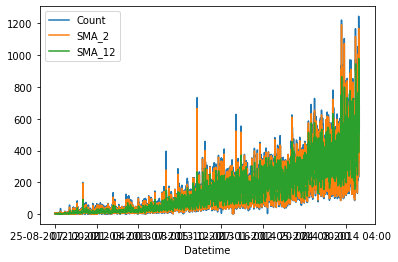

In [8]:
df.plot()

In [9]:
# EMA Sales
df1 = pd.DataFrame()
#Exponential Moving Average (EMA) does a superb job in capturing the pattern of the data (0,1)
# Let's smoothing factor - 0.1
df['EMA_0.1'] = df.Count.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
df['EMA_0.3'] = df.Count.ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Datetime'>

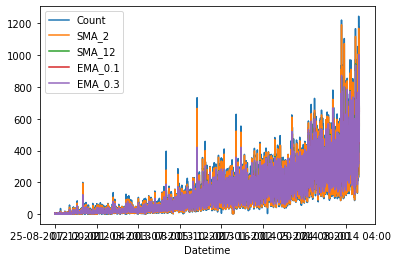

In [10]:
df.plot()

In [11]:
# import matplotlib.pyplot as plt
# rolmean = df.Count.rolling(window=12).mean()

# rolstd = df.Count.rolling(window=12).std()

# orig = plt.plot(df.Count,color='blue',label='original')

# mean = plt.plot(rolmean,color='red',label='Rolling Mean')

# std = plt.plot(rolstd,color='black',label='Rolling std')

# plt.legend()

# plt.title('Rolling mean and Std deviation')

# plt.show()



In [12]:
from statsmodels.tsa.stattools import adfuller


In [13]:
# df.isna().value_counts()

In [14]:
test_result=adfuller(df['Count'])
test_result  # 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\

(-4.456560536856817,
 0.00023540466467665943,
 45,
 18242,
 {'1%': -3.430708525404171,
  '5%': -2.861698454786869,
  '10%': -2.5668543412994906},
 181026.8337109476)

In [15]:
def adfuller_test(sales):
    result=adfuller(sales)
    #print(result)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [16]:
adfuller_test(df['Count'])

ADF Test Statistic : -4.456560536856817
p-value : 0.00023540466467665943
Lags Used : 45
Number of Observations Used : 18242
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
rolmean = df.Sales.rolling(window=12).mean()
rolstd = df.Sales.rolling(window=12).std()
